# Expectation Maximization for News Clustering

<br>


### Introduction to Clustering

Data clustering is the most commom form of [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning). The primary goal of unsupervised learning is to detect patterns in unlabeled data, which means there are no previous targets to forecasted. Clustering algorithms are useful for several tasks such as anomaly detection, customer segmentation, Insurance Fraud Detection and so on. Some of the most popular clustering algorithms developed are [Center-based](https://epubs.siam.org/doi/abs/10.1137/1.9780898718348.ch9?mobileUi=0) partitioning (e.g., KMeans), [density-based](https://en.wikipedia.org/wiki/Cluster_analysis#Density-based_clustering) clustering (e.g., DBSCAN), [hierarchical](https://en.wikipedia.org/wiki/Hierarchical_clustering) clustering, and [graphbased](http://www.slideshare.net/ssakpi/graph-based-clustering) clustering. 
<br><br>


From [geeksforgeeks](https://www.geeksforgeeks.org/clustering-in-machine-learning/) 
*Clustering is very much important as it determines the intrinsic grouping among the unlabeled data present. There are no criteria for a good clustering. It depends on the user, what is the criteria they may use which satisfy their need. For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection). This algorithm must make some assumptions which constitute the similarity of points and each assumption make different and equally valid clusters."*


*Here is an intuitive example of how clustering works:*

<img style="float: left;" src="assets\simpsons.jpg" alt="drawing" width="500" height="300" >

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

From this image we can understand how clustering works. We will choose different attributes from our data points. In this image family, place, gender  are used to create clusters. Other possibilities could be considered. We will always make numerical manipulations of our points according to the features we have from the data. <br>

### Expectation Maximization for Clustering <br>

The approach we will follow for EM in this project follows the work developed by professor [Gholamreza Haffari](http://users.monash.edu.au/~gholamrh/) from Monash University. 

In  this project we will cluster news from the BBC dataset. There are 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech. However, we are not interested in the labels as we will be applying an unsupervised technique. We will use the Expectation Maximization algorithm. 

From [rapidminer](https://docs.rapidminer.com/latest/studio/operators/modeling/segmentation/expectation_maximization_clustering.html)
<i>The EM (expectation maximization) technique is similar to the K-Means technique. The basic operation of K-Means clustering algorithms is relatively simple: Given a fixed number of k clusters, assign observations to those clusters so that the means across clusters (for all variables) are as different from each other as possible. The EM algorithm extends this basic approach to clustering in two important ways:
<br>
- Instead of assigning examples to clusters to maximize the differences in means for continuous variables, the EM clustering algorithm computes probabilities of cluster memberships based on one or more probability distributions. The goal of the clustering algorithm then is to maximize the overall probability or likelihood of the data, given the (final) clusters.
<br>
- The basic approach and logic of this clustering method is as follows. Suppose you measure a single continuous variable in a large sample of observations. Further, suppose that the sample consists of two clusters of observations with different means (and perhaps different standard deviations); within each sample, the distribution of values for the continuous variable follows the normal distribution. The goal of EM clustering is to estimate the means and standard deviations for each cluster so as to maximize the likelihood of the observed data (distribution). Put another way, the EM algorithm attempts to approximate the observed distributions of values based on mixtures of different distributions in different clusters.
<br>
- The results of EM clustering are different from those computed by k-means clustering. The latter will assign observations to clusters to maximize the distances between clusters. The EM algorithm does not compute actual assignments of observations to clusters, but classification probabilities. In other words, each observation belongs to each cluster with a certain probability. Of course, as a final result you can usually review an actual assignment of observations to clusters, based on the (largest) classification probability.</i>

*An image from the Ardian Umam* [blog](https://ardianumam.wordpress.com/2017/11/07/how-em-expectation-maximization-method-works-for-clustering/)<br>
<img style="float: left;" src="assets\em2.png" alt="drawing" width="500" height="300" >
<br><br><br><br><br><pre>

  - *This is 3D Visualization of different clusters.* 
  
  - *As we can see they follow a gaussian distribution.*
  
  - *We want to maximize the likelihood of points belonging to clusters .*

</pre>

Programming Language: R 3.6.1 in Jupyter Notebook

Libraries:
- reshape2
- ggplot2
- repr 
- NLP
- tm

#### Import Libraries 

In [2]:
options(warn=-1)
library(reshape2) # for melt and cast functions
library(ggplot2) # for plotting functions
library(repr) # to resize the plots
library(NLP) # natural language preprocessing
library(tm) # text mining library


## EM Math for Document Clustering<br>

Here, we first derive the Expectation and Maximization steps of the **hard-EM** algorithm for Document Clustering that we are going to implement in R. We also implement the soft version, but to be concise - as it is very similar and the differences can be understood in the code -  we don't derive it here.

### Soft-EM Pseudo-Code Derivation

In **Expectation** and **Maximization** steps we have incomplete data, i.e., the documents clusters are not given to us. They can be considered as **latent variables** $\{z_1, z_2, ... , z_N\}$ and are unseen.
   
Let's be $\theta := (\varphi,\mu_1,...,\mu_K)$ the collection of parameters where the parameters means:
* $\varphi=(\varphi_1,\varphi_2,...,\varphi_K)$ is the clusters proportion, with $\varphi_k \ge 0$ and $\sum_{k=1}^{K} \varphi_k =1$     (1)
* $\mu_k=(\mu_{k,1},\mu_{k,2},...,\mu_{k,|\mathcal{A}|})$ is the word proportion for each cluster, with $\mu_{k,w} \ge 0$ and $\sum_{w \in \mathcal{A}} \mu_{k,w} =1$     (2)

Our likelihood, the probability of the observed documents is: 
$$p(d_1,...d_N)=\prod _{n=1}^{N}p(d_n)=\prod _{n=1}^{N}\sum _{k=1}^{K}p(z_{n,k}=1,d_n)=\prod _{n=1}^{N}\sum _{k=1}^{K}\left ( \varphi _{k}\prod _{w\in\mathcal{A}}\mu_{k,w}^{c(w,d_n)} \right )$$ 

Applying the log in the equation above it yields:
$$ln\ p(d_1,...d_N)=\sum _{n=1}^{N}ln\ p(d_n)=\sum _{n=1}^{N}ln\sum _{k=1}^{K}p(z_{n,k}=1,d_n)=\sum _{n=1}^{N}ln\sum _{k=1}^{K}\left ( \varphi _{k}\prod _{w\in\mathcal{A}}\mu_{k,w}^{c(w,d_n)} \right )$$  

And the $\mathcal{Q}$ function (that is the basis of the EM algorithm) takes the form of:
$$\mathcal{Q}\left ( \theta,\theta^{old} \right ):=\sum _{n=1}^{N}\sum _{k=1}^{K}p(z_{n,k}=1|d_n,\theta^{old})\ ln\ p(z_{n,k}=1,d_n|\theta)\\
\\=\sum _{n=1}^{N}\sum _{k=1}^{K}p(z_{n,k}=1|d_n,\theta^{old})\left ( ln\varphi _k + \sum _{w\in\mathcal{A}}{c(w,d_n)}\ ln\  \mu_{k,w}\right )\\
=\sum _{n=1}^{N}\sum _{k=1}^{K}\gamma (z_{n,k})\left ( ln\varphi _k + \sum _{w\in\mathcal{A}}{c(w,d_n)}\ ln\ \mu_{k,w}\right )\\
$$

where $\gamma (z_{n,k}):= p(z_{n,k}=1|d_n,\theta^{old})$ are the responsability factors.

Maximizing the $\mathcal{Q}$ function using the Lagrangian to enforce the constraints (1) and (2) above, and setting the derivatives to zero leads to the following solutions for the parameters:
* $\varphi_k=\frac{N _k}{N}$ where $N_k := \sum _{n=1}^{N}\gamma (z_{n,k})$ (3) being the cluster proportion
* $\mu_{k,w}=\frac{\sum _{n=1}^{N}\gamma (z_{n,k})c(w,d_n)}{\sum _{w'\in\mathcal{A}} \sum _{n=1}^{N}\gamma (z_{n,k})c(w',d_n)}$ (4) being the word proportion for each cluster  


Thus, the EM Algorithm to learn the parameters and find the best values for the latent variables will follow these steps:

1) Choose an initial setting for the parameters $\theta^{old} := (\varphi^{old},\mu_1^{old},...,\mu_K^{old})$  

In the case of **hard-EM algorithm**, each data is assignment to one class with the largest posterior probability. Thus:  
$$ Z^{*} = argmax_z\ \gamma (z_{n,k})= argmax_z\ p(z_{n,k}=1|d_n,\theta^{old})$$

And there is no expectation in over the latent variables in the definition of the $\mathcal{Q}$ function. Thus:
$$\mathcal{Q}(\theta,\theta^{old})= \sum _{n=1}^{N} ln\ p(z_{n,k=Z^*}=1,d_n|\theta)$$

2) While the convergence (stop condition) is not met: 

* **Expectation (E) step:** based on the current values for the parameters $\theta^{old} := (\varphi^{old},\mu_1^{old},...,\mu_K^{old})$ we will set $\forall n$ and $\forall k$ a $Z^*$ such as:   

$$ Z^{*} \leftarrow  argmax_z\ \gamma (z_{n,k})= argmax_z\ p(z_{n,k}=1|d_n,\theta^{old})$$

        
* **Maximization (M) step:** based on the result of $ Z^{*}$ calculated on the **E-step** above, we re-estimate the values of parameters $(\varphi_k,\mu_{k,w})$ to calculate the $\theta^{new}$ using the equations (3) and (4) above:  

$$\theta^{new} \leftarrow argmax_\theta\ \mathcal{Q}(\theta,\theta^{old})= argmax_\theta \sum _{n=1}^{N} ln\ p(z_{n,k=Z^*}^{*}=1,d_n|\theta)\\
= argmax_\theta\ \sum _{n=1}^{N}\left (ln\varphi _{k=Z^*} + \sum _{w\in\mathcal{A}}{c(w,d_n)}ln\ \mu_{k=Z^*,w}\right )$$

what setting the partial derivatives to zero leads to the following solutions for the parameters:
* $\varphi_k^{new}=\frac{N _k}{N}$ where $N_k := \sum _{n=1}^{N}z_{n,k=Z^*}$ --> being the cluster proportion
* $\mu_{k,w}^{new}=\frac{\sum _{n=1}^{N}z_{n,k=Z^*}c(w,d_n)}{\sum _{w'\in\mathcal{A}} \sum _{n=1}^{N} z_{n,k=Z^*}c(w',d_n)}$ --> being the word proportion for each cluster  

3) $\theta^{old}\leftarrow \theta^{new}$

Implementation of the Hard-EM (derived above) and soft-EM for document clustering.

## EM For Document Clustering - Implementation

#### Helper Function

This function is needed to prevent numerical overflow/underflow when working with small numbers, because we can easily get small numbers by multiplying $p1 * p2 * ... * pn (where 0 <= pi <= 1$ are probabilities). Example: Suppose we are interested in $p1xp2xp3 + q1xq2xq3$ where all numbers are probabilities in $[0,1]$. To prevent numerical errors, we do the computation in the log space and convert the result back using the exp func. Hence our approach is to form the vector $v = log(p1)+log(p2)+log(p3) , log(q1)+log(q2)+log(q3)]$ 
Then get the results by: $exp(logSum(v))$<br>
Input:    $logA1, logA2 ... logAn$ <br>
Output:   $log(A1+A2+...+An)$

In [3]:
logSum <- function(v) {
   m = max(v)
   return ( m + log(sum(exp(v-m))))
}

### Initialize model parameters randomly

In [4]:
initial.param <- function(vocab_size, K=4, seed=123456){
  set.seed(seed)
  rho <- matrix(1/K,nrow = K, ncol=1) # assume all clusters have the same size (we will update this later on)
  mu <- matrix(runif(K*vocab_size),nrow = K, ncol = vocab_size)    # initiate Mu 
  mu <- prop.table(mu, margin = 1)   # normalization to ensure that sum of each row is 1
  return (list("rho" = rho, "mu"= mu))
}

### E-Step for Document Clustering 

We now use a function to perform the E-step iteraction. Some information about the parameters of the function:

**Inputs:**
   - `gamma`:  the matrix of posterior probabilities NxK
   - `model`: the list of parameters (priors Kx1 and means KxVocabSize)
   - `counts`: the word-document frequency matrix
   - `soft`: TRUE if soft EM, FALSE if Hard EM
   
**Outputs:**
   - `gamma`:  the matrix of posterior probabilities NxK for the given parameters (if soft = TRUE) 
   - `z_star`:  the vector Nx1 of hard choosen classes for each document given gamma (if soft = FALSE) 
 

In [5]:
E.step <- function(gamma, model, counts, soft = TRUE){
  # Model Parameter Setting
  N <- dim(counts)[2] # number of documents
  K <- dim(model$mu)[1]

  # E step:    
  for (n in 1:N){
    for (k in 1:K){
      ## calculate the posterior based on the estimated mu and rho in the "log space"
      gamma[n,k] <- log(model$rho[k,1]) +  sum(counts[,n] * log(model$mu[k,])) 
    }
    # normalisation to sum to 1 in the log space
    logZ = logSum(gamma[n,])
    gamma[n,] = gamma[n,] - logZ
  }
  
  # converting back from the log space 
  gamma <- exp(gamma)
  # if it is hard EM, we need to select the K with highest gamma
  if(soft == FALSE){
      z_star = max.col(gamma, 'first') # gets the "argmax" class for each observation   
  }
  # if we are doing Hard-EM, we return "z_star", which are the classes assigned for each n, 
  # if we are doing soft-EM, we return "gamma", which is the matrix with posterior probabilities for each k,n
  if(soft==FALSE){
      return(z_star)
  }else{return(gamma)}
}

### M Step for Document Clustering

**Inputs:**
   - `gamma.z_star` (if soft = TRUE) :  the matrix of posterior probabilities NxK for the given parameters 
   - `gamma.z_star` (if soft = FALSE) :  the vector Nx1 of hard choosen classes for each document given gamma 
   - `model`: the list of old parameters (class priors Kx1 and class means KxVocabSize)
   - `counts`: the word-document frequency matrix
   - `soft`: TRUE if soft EM, FALSE if Hard EM
   
**Outputs:**
   - `model`: the list of updated parameters (priors Kx1 and means KxVocabSize)

In [6]:
M.step <- function(gamma.z_star, model, counts, soft = TRUE){
  # Model Parameter Setting
  N <- dim(counts)[2]   # number of documents
  W <- dim(counts)[1]   # number of words i.e. vocabulary size
  K <- dim(model$mu)[1] # number of clusters
  # to avoid NaN where all elements are zeros when calculating the new  means
  eps = matrix(1e-10, nrow = W, ncol = N)
  
  if(soft== TRUE){ # Soft-EM
      gamma = gamma.z_star
      for (k in 1:K){
          ## recalculate the estimations:
          model$rho[k] <- sum(gamma[,k])/N  # the relative cluster size
          model$mu[k,] <- ((counts%*%gamma[,k])+eps[,k])/sum((counts%*%gamma[,k])+eps[,k]) # new means
    
    }      
  }else{ # Hard-EM
      z_star = gamma.z_star
      for (k in 1:K){
          ## recalculate the estimations:
          ## recalculate the estimations:
          model$rho[k] <- sum(z_star==k)/N  # the relative cluster size          
          model$mu[k,] <- rowSums(counts[,z_star==k]+eps[,z_star==k])/sum(rowSums(counts[,z_star==k]+eps[,z_star==k])) 
          # new means
    }

  }

  # Return the result
  return (model)
}

### The Training Objective Function

**Inputs:**
   - `model`:  the model object containing the mu and rho
   - `counts`: the word-document frequency matrix
   
**Outputs:**
   - `nloglike`: the negative log-likelihood i.e. log P(counts|model) 

In [7]:
train_obj <- function(model, counts) { 
  N <- dim(counts)[2] # number of documents
  K <- dim(model$mu)[1]
   
  nloglike = 0
  for (n in 1:N){
    lprob <- matrix(0,ncol = 1, nrow=K)
    for (k in 1:K){
      lprob[k,1] = sum(counts[,n] * log(model$mu[k,])) 
    }
    nloglike <- nloglike - logSum(lprob + log(model$rho))
  }
  
  return (nloglike)
}

### EM for Document Clustering

**Inputs:**
   - `counts`: word count matrix
   - `K`: the number of clusters
   
**Outputs:**
   - `model`: a list of model parameters 

In [8]:
EM <- function(counts, K=4, max.epoch=10, seed=123456, soft = TRUE){
  
  # Model Parameter Setting
  N <- dim(counts)[2] # number of documents
  W <- dim(counts)[1] # number of unique words (in all documents)
  
  # Initialization
  model <- initial.param(W, K=K, seed=seed)
  gamma <- matrix(0, nrow = N, ncol = K)

  print(train_obj(model,counts))
  # Build the model
  for(epoch in 1:max.epoch){
    
    # E Step
    gamma_kmax <- E.step(gamma, model, counts, soft = soft)
    # M Step
    model <- M.step(gamma_kmax, model, counts, soft = soft)
   
    print(train_obj(model, counts)) 
  }
  # Return Model
  if(soft==TRUE){
      return(list("model"=model,"gamma"=gamma_kmax))}else{
      return(list("model"=model,"k_max"=gamma_kmax))
  }
}

### Read and Pre-process Data

**Inputs:**
   - `file.name`: name of the input .txt file
   - `spr.ratio`: is used to reduce the sparcity of data by removing very infrequent words
   
**Outputs:**
   - `docs`: the unlabled corpus (each row is a document)
   - `word.doc.mat`: the count matrix (each rows and columns corresponds to words and documents, respectively)
   - `label`: the real cluster labels (will be used in visualization/validation and not for clustering)


In [9]:
# reading the data
read.data <- function(file.name='./bbc-text.csv', spr.ratio=0.90) {

  # Read the data
  text_df <- read.csv(file.name, colClasses = c('factor', 'character'))
  ## the terms before the first '\t' are the lables (the newsgroup names) and all the remaining text after '\t' 
  ##are the actual documents
  docs <- text_df
  colnames(docs) <- c("doc_id", "text")
  docs$doc_id <- rownames(docs)
  # store the labels for evaluation
  labels <-  text_df$category
    
  library(tm)
  # create a corpus
  docs <- DataframeSource(docs)
  corp <- Corpus(docs)
  
  # Preprocessing:
  corp <- tm_map(corp, removeWords, stopwords("english")) # remove stop words 
    #(the most common word in a language that can be find in any document)
  corp <- tm_map(corp, removePunctuation) # remove pnctuation
  corp <- tm_map(corp, stemDocument) # perform stemming (reducing inflected and derived words to their root form)
  corp <- tm_map(corp, removeNumbers) # remove all numbers
  corp <- tm_map(corp, stripWhitespace) # remove redundant spaces 
  # Create a matrix which its rows are the documents and colomns are the words. 
  dtm <- DocumentTermMatrix(corp)
  ## reduce the sparcity of out dtm
  dtm <- removeSparseTerms(dtm, spr.ratio)
  ## convert dtm to a matrix
  word.doc.mat <- t(as.matrix(dtm))
  
  # Return the result
  return (list("docs" = docs, "word.doc.mat"= word.doc.mat, "labels" = labels))
}
# Reading documents 
## Note: sample.size=0 means all read all documents!
data <- read.data(file.name='data\\bbc-text.csv', spr.ratio= .99)
# word-document frequency matrix 
counts <- data$word.doc.mat

In [10]:
head(counts[,1:5], n = 10L)

,1,2,3,4,5
accord,1,0,0,0,1
adam,1,0,0,0,0
advert,1,0,0,0,0
advertis,2,0,0,0,0
allow,2,0,0,0,0
alreadi,1,1,0,1,0
also,3,0,0,0,0
although,1,0,0,0,0
announc,1,0,0,0,0
annual,1,0,0,0,0


In [11]:
#  run soft-EM algorithm on the provided data
res_soft <- EM(counts, K=4, max.epoch=10, seed = 200)  
# visualization
## find the culster with the maximum probability (since we have soft assignment here)
label.hat.soft <- apply(res_soft$gamma, 1, which.max)

[1] 3053548
[1] 2719248
[1] 2685263
[1] 2669863
[1] 2656975
[1] 2650719
[1] 2649041
[1] 2648498
[1] 2648188
[1] 2648060
[1] 2647991


In [12]:
#  run soft-EM algorithm on the provided data
res_hard <- EM(counts, K=4, max.epoch=10, soft = FALSE, seed = 200)  
# visualization
## find the choosen cluster (since we have hard assignment here)
label.hat.hard <- res_hard$k_max

[1] 3053548
[1] 2720130
[1] 2686664
[1] 2670998
[1] 2657195
[1] 2651093
[1] 2649465
[1] 2648918
[1] 2648824
[1] 2648763
[1] 2648748


# Visualizing Clusters With PCA

We want to visualise the clusters, but we have 2347 variables. It’s not possible to plot it directly; we need to reduce the number of dimensions, ideally to 2 or 3 so that we can get a good broad view of the patterns captured. A popular and simple technique for dimensionality reduction is **PCA**. I won’t derive the calculation of the principal components here, but, in a nutshell, it provides variables which keep the maximum amount of variation of the original dataset. Here, we plot the first two principal components and normalize the data for better visualization.

In [13]:
counts<-scale(counts) # normalize the data
##--- Cluster Visualization -------------------------------------------------
cluster.viz <- function(doc.word.mat, color.vector, title=' '){
  p.comp <- prcomp(doc.word.mat, scale. = TRUE, center = TRUE)
  plot(p.comp$x, col=color.vector, pch=1,  main=title)
}

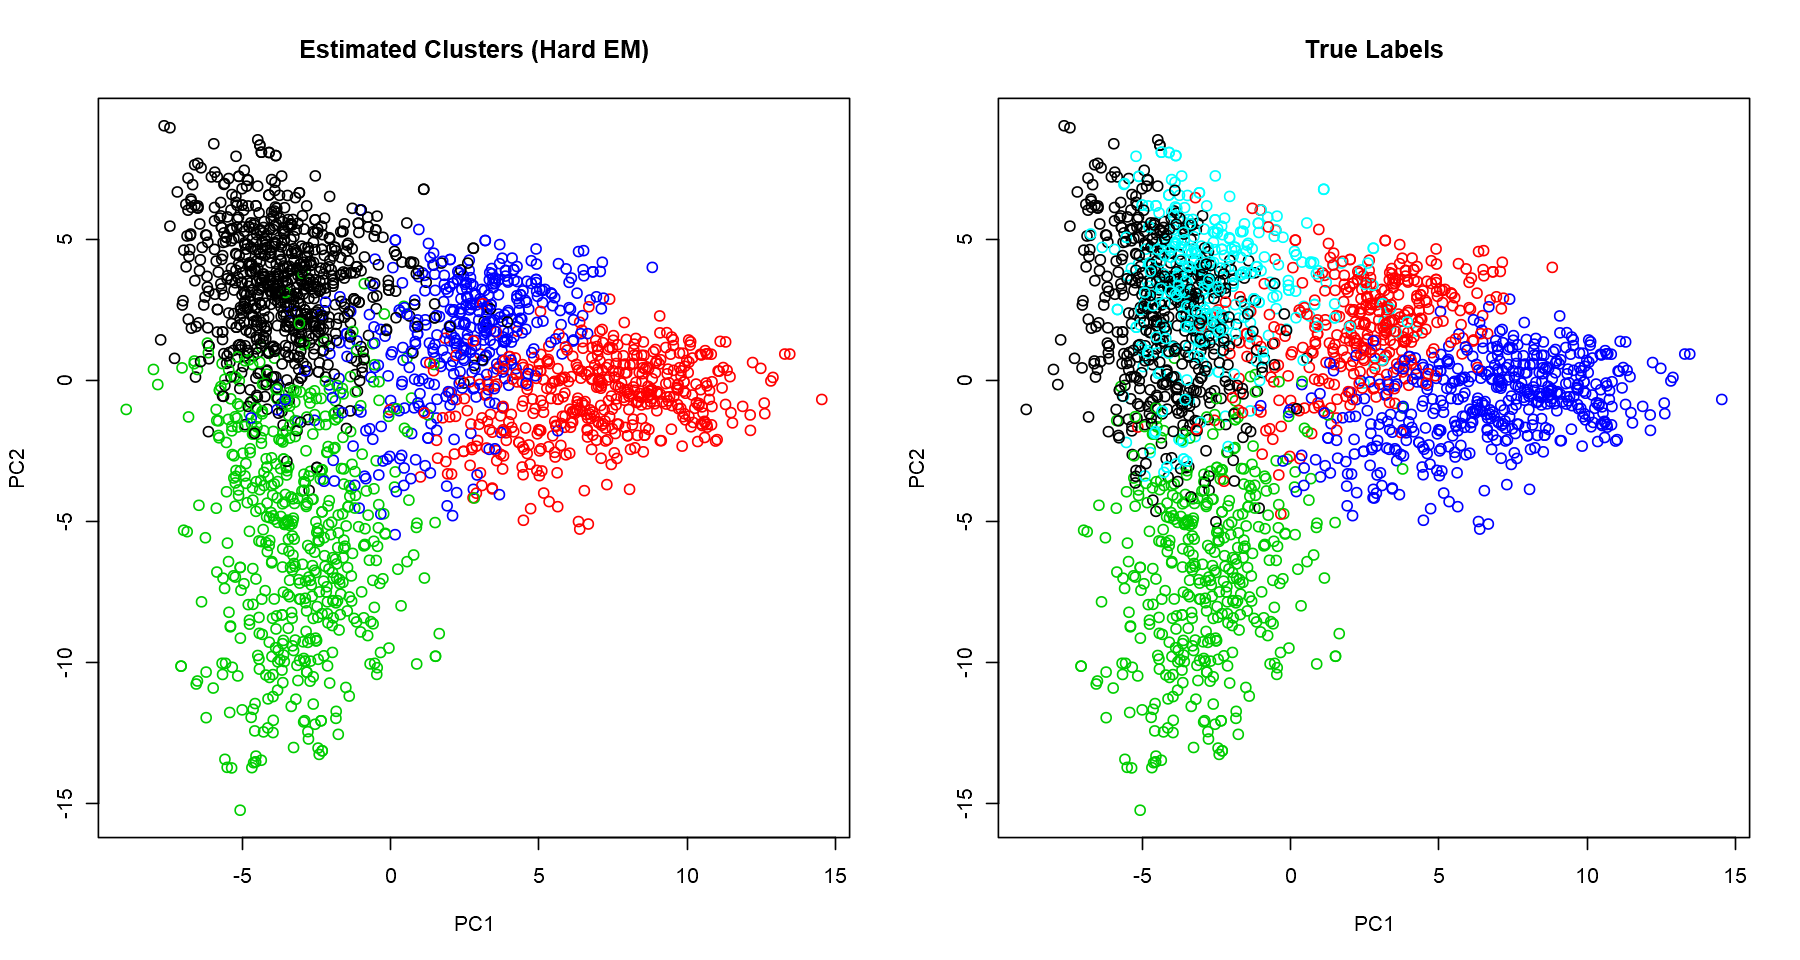

In [14]:
options(repr.plot.width=15, repr.plot.height=8) # adjusting the plot size
par(mfrow=c(1,2)) # show plots in 1 row, 2 columns
## visualize the estimated clusters
counts <- scale(counts)
cluster.viz(t(counts), label.hat.hard, 'Estimated Clusters (Hard EM)')
cluster.viz(t(counts), data$labels, 'True Labels')

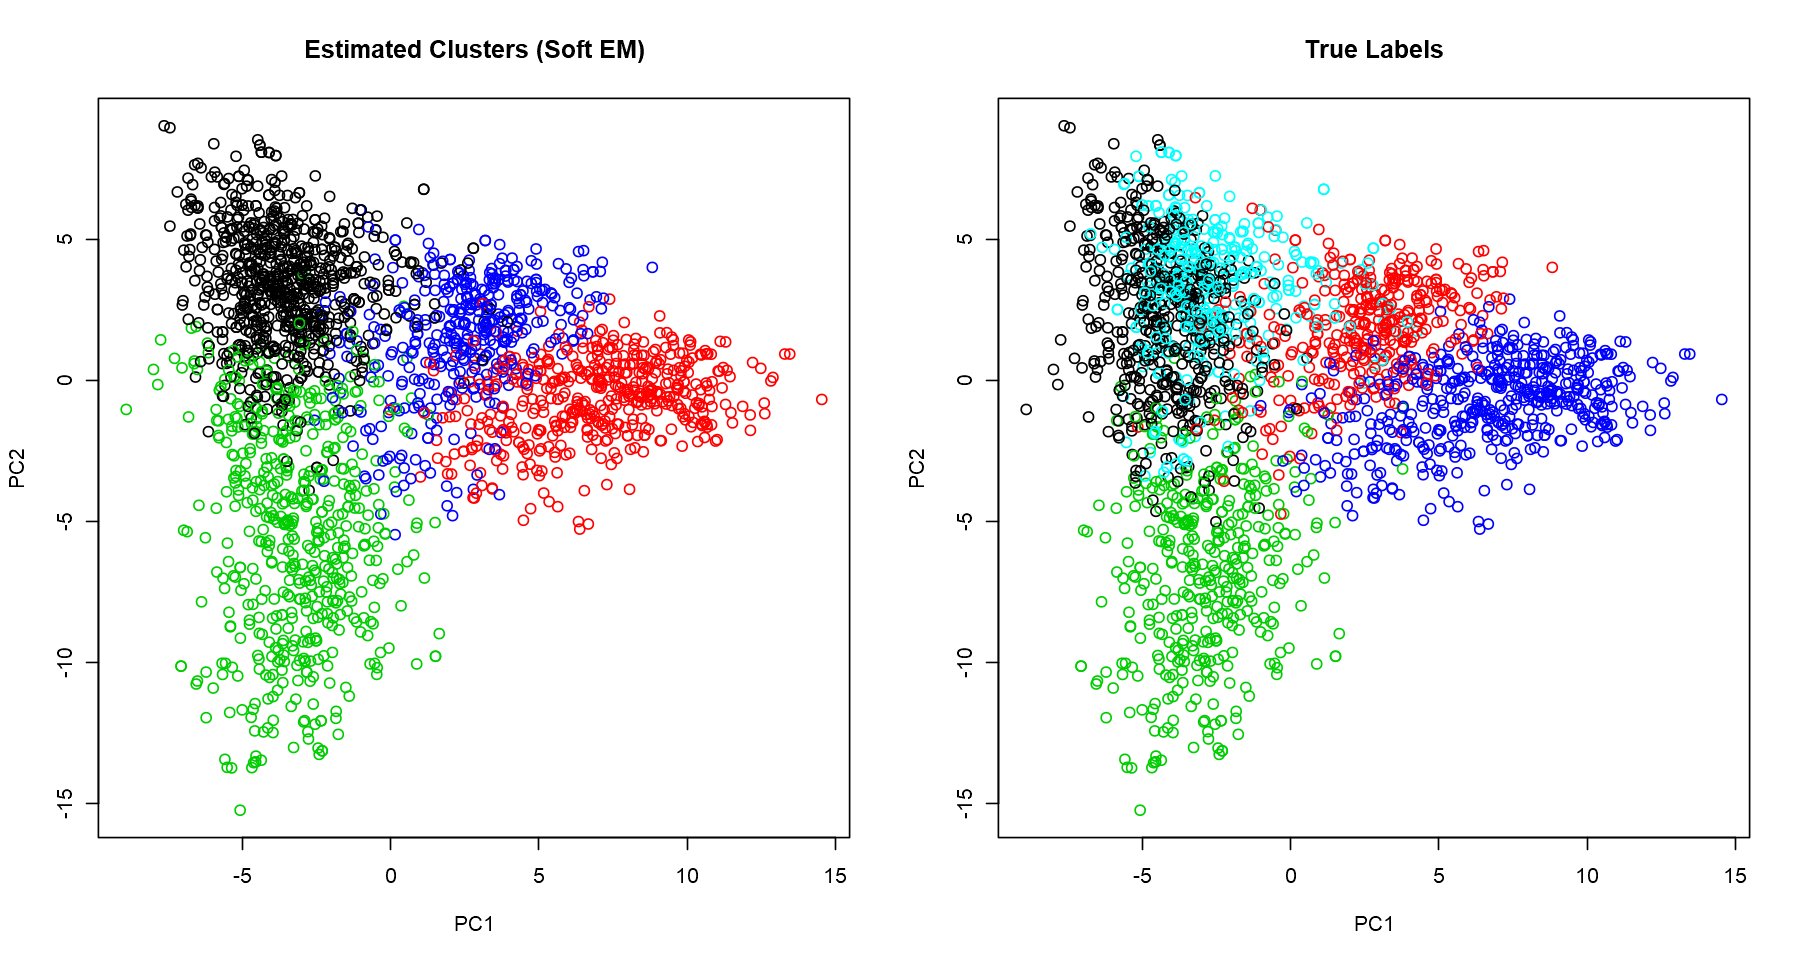

In [15]:
options(repr.plot.width=15, repr.plot.height=8) # adjusting the plot size
par(mfrow=c(1,2)) # show plots in 1 row, 2 columns
## visualize the estimated clusters
cluster.viz(t(counts), label.hat.soft, 'Estimated Clusters (Soft EM)')
cluster.viz(t(counts), data$labels, 'True Labels')

## Now judge for yourself

Are these good clusters? 
Lets have a look in a few examples and see if it makes sense.

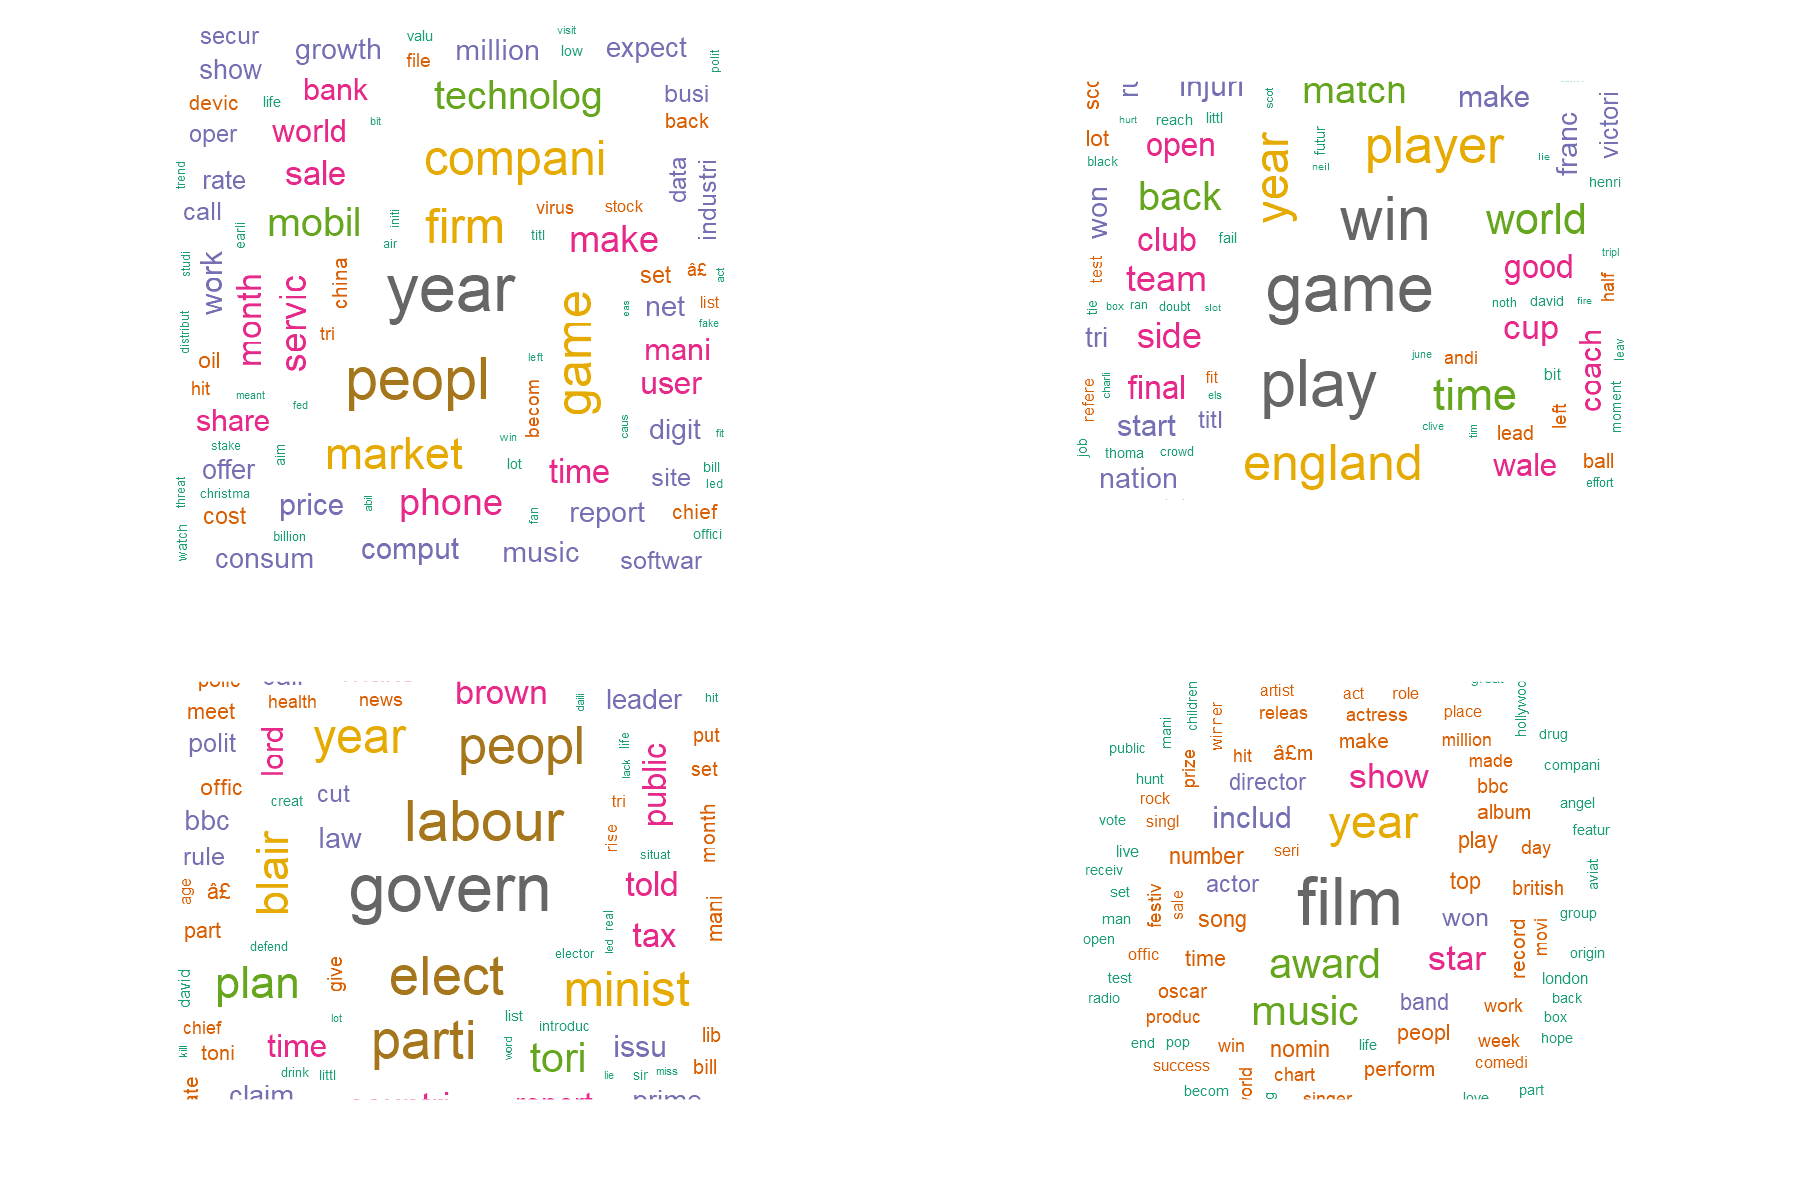

In [27]:
library(RColorBrewer)
library(wordcloud)

# Import data again
data <- read.data(file.name='data\\bbc-text.csv', spr.ratio= .99)
counts <- data$word.doc.mat
colnames(counts) <- label.hat.hard
EM_cluster <- t(rowsum(t(counts), group = colnames(counts), na.rm = T))
colnames(EM_cluster) <- c("C1","C2","C3","C4")


# Also remove some additional stopwords that haven't been removed for the clustering purpose
stopwords <- read.table('data\\stopwords.txt', header = FALSE, sep = "", dec = ".")
EM_cluster <- as.data.frame(EM_cluster)
`%notin%` <- Negate(`%in%`)
EM_cluster <- subset(EM_cluster, rownames(EM_cluster) %notin% as.vector(stopwords[,1]))


# Generate wordclouds
options(repr.plot.width=15, repr.plot.height=10)

par(mfrow=c(2,2)) # show plots in 2 rows, 2 columns

W1 <- wordcloud(words = rownames(EM_cluster), freq = EM_cluster$C1, min.freq = 0,
          max.words=1000, random.order=FALSE, 
          colors=brewer.pal(8, "Dark2"))

W2 <- wordcloud(words = rownames(EM_cluster), freq = EM_cluster$C2, min.freq = 0,
          max.words=1000, random.order=FALSE, 
          colors=brewer.pal(8, "Dark2"))

W3 <- wordcloud(words = rownames(EM_cluster), freq = EM_cluster$C3, min.freq = 0,
          max.words=1000, random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

W4 <- wordcloud(words = rownames(EM_cluster), freq = EM_cluster$C4, min.freq = 0,
          max.words=100, random.order=FALSE, 
          colors=brewer.pal(8, "Dark2"))